In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
#Прочитайте csv файл (використовуйте функцію read_csv)
df = pd.read_csv("bestsellers with categories.csv")
print(df)

                                                  Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year        Genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson          4.7    18979     15  201

In [32]:
#Виведіть перші п'ять рядків (використовується функція head)
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [33]:
#Виведіть розміри датасету (використовуйте атрибут shape)
rows,columns = df.shape
print(rows)
print(columns)

550
7


In [34]:
#Відповідь: Про скільки книг зберігає дані датасет?
print("Про 550 книг")

Про 550 книг


In [35]:
#Давайте змінимо регістр на малий, а пробіл замінимо на нижнє підкреслення (snake_style). 
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


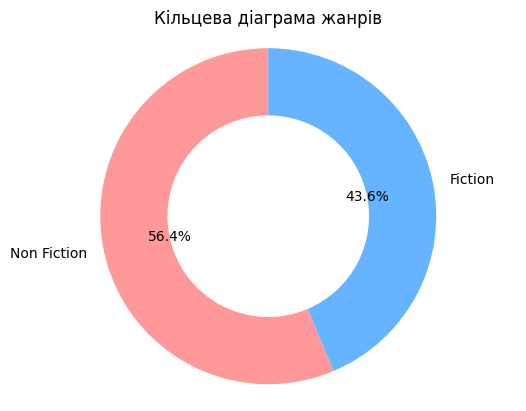

In [66]:
books_with_genre = df['genre'].value_counts()
fig, ax = plt.subplots()
ax.pie(books_with_genre, labels=books_with_genre.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'], wedgeprops=dict(width=0.4))
ax.axis('equal') 

plt.title('Кільцева діаграма жанрів')
plt.show()

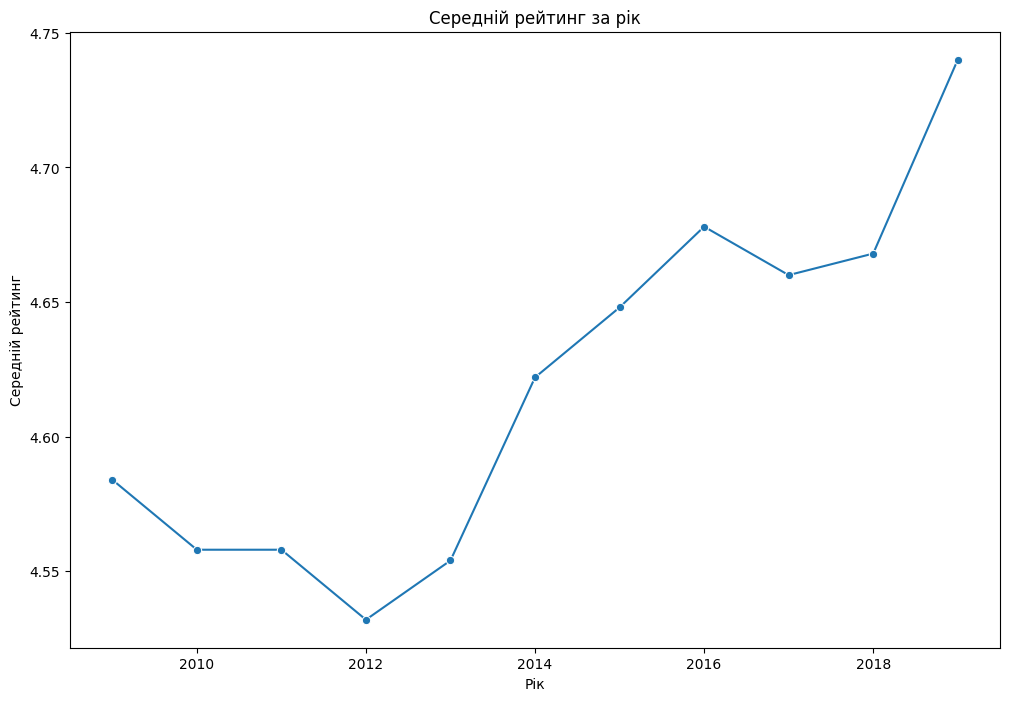

In [68]:
average_rating_by_year = df.groupby('year')['user_rating'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='user_rating', data=average_rating_by_year, marker='o')
plt.title('Середній рейтинг за рік')
plt.xlabel('Рік')
plt.ylabel('Середній рейтинг')
plt.show()

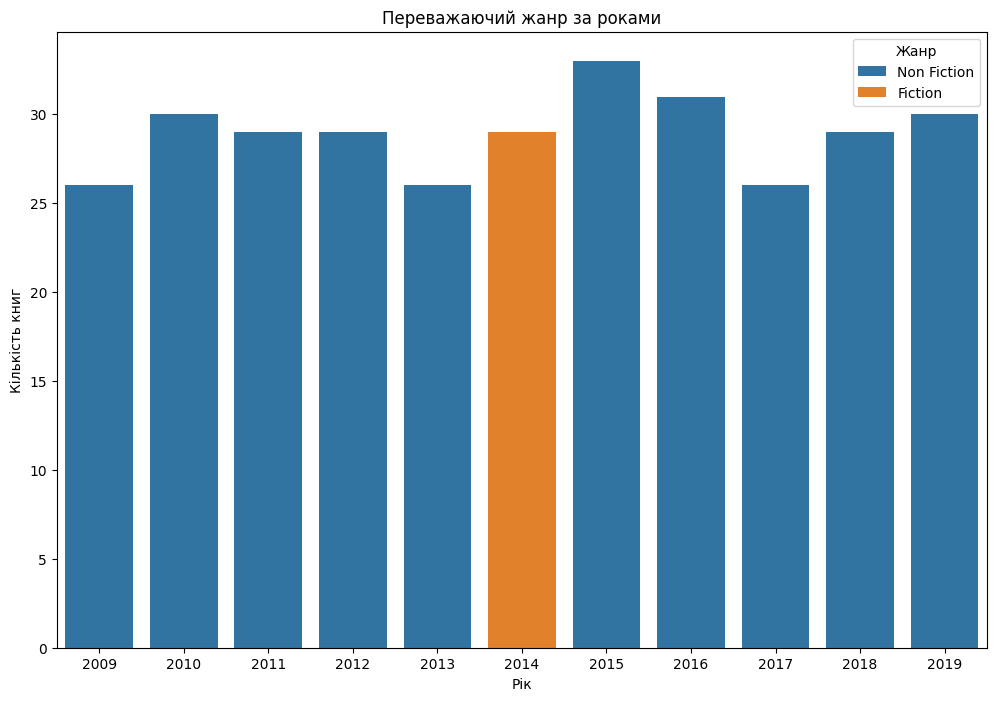

In [72]:
books_genre_year = df.groupby(['year', 'genre']).size().reset_index(name='Number of Books')

dominant_genres = books_genre_year.loc[books_genre_year.groupby('year')['Number of Books'].idxmax()]

plt.figure(figsize=(12, 8))
sns.barplot(x='year', y='Number of Books', hue='genre', data=dominant_genres)
plt.title('Переважаючий жанр за роками')
plt.xlabel('Рік')
plt.ylabel('Кількість книг')
plt.legend(title='Жанр')
plt.show()

In [36]:
#Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
print(df.isna().sum())

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


In [37]:
#Відповідь: Чи є в якихось змінних пропуски? (Так / ні)
print("No")

No


In [38]:
#Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
print(df["genre"].unique())

['Non Fiction' 'Fiction']


In [39]:
#Відповідь: Які є унікальні жанри?
print("'Non Fiction' and 'Fiction'")

'Non Fiction' and 'Fiction'


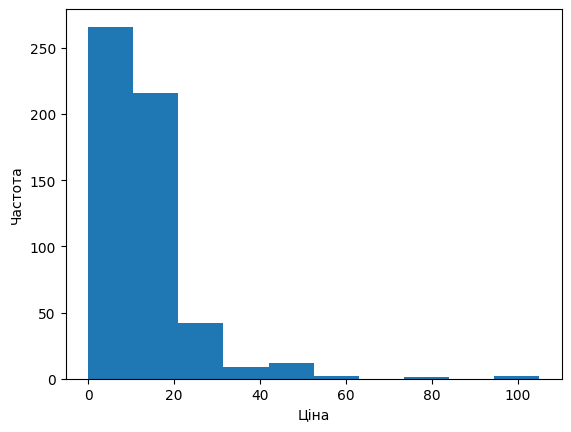

In [40]:
#Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
df['price'].plot(kind='hist')
plt.xlabel('Ціна')
plt.ylabel('Частота')
plt.show()

In [41]:
#Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
print(df["price"].max())
print(df["price"].min())
print(df["price"].mean())
print(df["price"].median())

105
0
13.1
11.0


In [42]:
#Відповідь: Максимальна ціна? Відповідь: Мінімальна ціна? Відповідь: Середня ціна? Відповідь: Медіанна ціна?
print("Відповідь: Максимальна ціна? 105")
print("Відповідь: Мінімальна ціна? 0")
print("Відповідь: Середня ціна? 13.1")
print("Відповідь: Медіанна ціна? 11.0")

Відповідь: Максимальна ціна? 105
Відповідь: Мінімальна ціна? 0
Відповідь: Середня ціна? 13.1
Відповідь: Медіанна ціна? 11.0


In [43]:
#Відповідь: Який рейтинг у датасеті найвищий? Відповідь:
print(f'Відповідь:{df["user_rating"].max()}')

Відповідь:4.9


In [44]:
#Відповідь: Скільки книг мають такий рейтинг?
books = df[df['user_rating'] == 4.9]
print('Відповідь:',books.shape[0])

Відповідь: 52


In [45]:
#Відповідь: Яка книга має найбільше відгуків? 
reviews = df["reviews"].max()
book = df.loc[df['reviews'] == reviews]
print('Відповідь:',book['name'].values[0])

Відповідь: Where the Crawdads Sing


In [46]:
#Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?
books_2015 = df[df['year'] == 2015]
price_max_index = books_2015["price"].idxmax()
book_with_max_price = df.loc[price_max_index]
print('Відповідь:',book_with_max_price['name'])

Відповідь: Publication Manual of the American Psychological Association, 6th Edition


In [47]:
#Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?
genre_fiction = df[(df['genre']=='fiction') & (df["year"] == 2010)]
print('Відповідь:', len(genre_fiction))

Відповідь: 0


In [48]:
#Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? 
books = df[(df['user_rating'] == 4.9) & ((df["year"] == 2010) | (df["year"] == 2011))]
print('Відповідь:', len(books))

Відповідь: 1


In [49]:
#І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
books_2015 = df[(df["year"] == 2015)&(df["price"] <= 8)]
print(books_2015.sort_values(by='price'))

                                                  name  \
507                              To Kill a Mockingbird   
54   Creative Haven Creative Cats Coloring Book (Ad...   
111                                    First 100 Words   
123                               Giraffes Can't Dance   
206                         Knock-Knock Jokes for Kids   
210                      Laugh-Out-Loud Jokes for Kids   
224                                   Love You Forever   
28                        Baby Touch and Feel: Animals   
55   Creative Haven Owls Coloring Book (Adult Color...   
63                      Dear Zoo: A Lift-the-Flap Book   
89   Dover Creative Haven Art Nouveau Animal Design...   
478                        The Very Hungry Caterpillar   
201  Killing Reagan: The Violent Assault That Chang...   
376  The Four Agreements: A Practical Guide to Pers...   
16   Adult Coloring Book: Stress Relieving Animal D...   
17      Adult Coloring Book: Stress Relieving Patterns   
253           

In [50]:
#Відповідь: Яка книга остання у відсортованому списку?
book = books_2015.sort_values(by='price').iloc[-1]
print('Відповідь:', book["name"])

Відповідь: Jesus Calling: Enjoying Peace in His Presence (with Scripture References)


In [61]:
#Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам
price_genre = df.groupby("genre").agg({'price': ['min', 'max']})
print(price_genre)
print("Відповідь: Максимальна ціна для жанру Fiction: 82")
print("Відповідь: Мінімальна ціна для жанру Fiction: Відповідь 0")
print("Відповідь: Максимальна ціна для жанру Non Fiction: Відповідь 105")
print("Відповідь: Мінімальна ціна для жанру Non Fiction: Відповідь 0")

            price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105
Відповідь: Максимальна ціна для жанру Fiction: 82
Відповідь: Мінімальна ціна для жанру Fiction: Відповідь 0
Відповідь: Максимальна ціна для жанру Non Fiction: Відповідь 105
Відповідь: Мінімальна ціна для жанру Non Fiction: Відповідь 0


In [51]:
#Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні
author_books = df.groupby('author').agg(count_books=('author', 'count'))
print(author_books)
print(f"Відповідь: Якої розмірності вийшла таблиця? Відповідь:{author_books.shape}")
print(f"Відповідь: Який автор має найбільше книг? Відповідь:{author_books['count_books'].idxmax()}")
print(f"Відповідь: Скільки книг цього автора? Відповідь:{author_books['count_books'][author_books['count_books'].idxmax()]}")

                            count_books
author                                 
Abraham Verghese                      2
Adam Gasiewski                        1
Adam Mansbach                         1
Adir Levy                             1
Admiral William H. McRaven            1
...                                 ...
Walter Isaacson                       3
William Davis                         2
William P. Young                      2
Wizards RPG Team                      3
Zhi Gang Sha                          2

[248 rows x 1 columns]
Відповідь: Якої розмірності вийшла таблиця? Відповідь:(248, 1)
Відповідь: Який автор має найбільше книг? Відповідь:Jeff Kinney
Відповідь: Скільки книг цього автора? Відповідь:12


In [52]:
#Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні
rating_df = df.groupby('author').agg(mean_rating=('user_rating', 'mean'))
print(rating_df)
print(f"Відповідь: У якого автора середній рейтинг мінімальний? Відповідь:{rating_df.loc[rating_df['mean_rating'].idxmin()].name}")
print(f"Відповідь: Який у цього автора середній рейтинг? Відповідь:{rating_df.loc[rating_df['mean_rating'].idxmin()].mean_rating}")

                            mean_rating
author                                 
Abraham Verghese               4.600000
Adam Gasiewski                 4.400000
Adam Mansbach                  4.800000
Adir Levy                      4.800000
Admiral William H. McRaven     4.700000
...                                 ...
Walter Isaacson                4.566667
William Davis                  4.400000
William P. Young               4.600000
Wizards RPG Team               4.800000
Zhi Gang Sha                   4.600000

[248 rows x 1 columns]
Відповідь: У якого автора середній рейтинг мінімальний? Відповідь:Donna Tartt
Відповідь: Який у цього автора середній рейтинг? Відповідь:3.9


In [53]:
#З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну
result = pd.concat([author_books, rating_df], axis=1)
print(result)

                            count_books  mean_rating
author                                              
Abraham Verghese                      2     4.600000
Adam Gasiewski                        1     4.400000
Adam Mansbach                         1     4.800000
Adir Levy                             1     4.800000
Admiral William H. McRaven            1     4.700000
...                                 ...          ...
Walter Isaacson                       3     4.566667
William Davis                         2     4.400000
William P. Young                      2     4.600000
Wizards RPG Team                      3     4.800000
Zhi Gang Sha                          2     4.600000

[248 rows x 2 columns]


In [54]:
#Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)
sort_result = result.sort_values(by=['count_books','mean_rating'])
print(sort_result)

                                    count_books  mean_rating
author                                                      
Muriel Barbery                                1     4.000000
Chris Cleave                                  1     4.100000
Ian K. Smith M.D.                             1     4.100000
Pierre Dukan                                  1     4.100000
Elizabeth Strout                              1     4.200000
...                                         ...          ...
American Psychological Association           10     4.500000
Suzanne Collins                              11     4.663636
Gary Chapman                                 11     4.736364
Rick Riordan                                 11     4.772727
Jeff Kinney                                  12     4.800000

[248 rows x 2 columns]


In [55]:
#Відповідь: Який автор перший у списку?
print(f"Відповідь:",sort_result['count_books'].idxmin())

Відповідь: Muriel Barbery
